In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import validation data
LR_val = pd.read_csv("./Results/LR_val.csv")
Ada_val = pd.read_csv("./Results/Adaboost_val.csv")
KNN_val = pd.read_csv("./Results/KNN_val.csv")
RF_val = pd.read_csv("./Results/RandomFR_val.csv")
XGB_val = pd.read_csv("./Results/XGBoosting_val.csv")
SVM_val = pd.read_csv("./Results/SVM_val.csv")
Tree_val = pd.read_csv("./Results/DecisionTree_val.csv")

In [3]:
LR_val[LR_val['ACC'] == LR_val['ACC'].max()]

,Unnamed: 0,Gene,ACC,Precision,Sp,Sn,F1_score,AUC,Params
11,11,"['IL18', 'FER1L3', 'AL157484', 'VPS13C', 'LOC6...",86.52,84.16,90.86,79.44,81.73,91.45,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '..."
19,19,"['IL18', 'FER1L3', 'AL157484', 'VPS13C', 'LOC6...",86.52,84.16,90.86,79.44,81.73,90.96,"{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', '..."


In [4]:
# Import test data
LR_test = pd.read_csv("./Results/LR_test.csv")
Ada_test = pd.read_csv("./Results/Adaboost_test.csv")
KNN_test = pd.read_csv("./Results/KNN_test.csv")
RF_test = pd.read_csv("./Results/RandomFR_test.csv")
XGB_test = pd.read_csv("./Results/XGBoosting_test.csv")
SVM_test = pd.read_csv("./Results/SVM_test.csv")
Tree_test = pd.read_csv("./Results/DecisionTree_test.csv")

In [5]:
# Get max accuracy of validation 
LR_max = LR_val['ACC'].max()
Ada_max = Ada_val['ACC'].max()
KNN_max = KNN_val['ACC'].max()
RF_max = RF_val['ACC'].max()
XGB_max = XGB_val['ACC'].max()
SVM_max = SVM_val['ACC'].max()
Tree_max = Tree_val['ACC'].max()

In [6]:
# Get gene optimal of validation data
LR_gene = len(LR_val[LR_val['ACC'] == LR_val['ACC'].max()]['Gene'].values[0].split(','))
Ada_gene = len(Ada_val[Ada_val['ACC'] == Ada_val['ACC'].max()]['Gene'].values[0].split(','))
KNN_gene = len(KNN_val[KNN_val['ACC'] == KNN_val['ACC'].max()]['Gene'].values[0].split(','))
RF_gene = len(RF_val[RF_val['ACC'] == RF_val['ACC'].max()]['Gene'].values[0].split(','))
XGB_gene = len(XGB_val[XGB_val['ACC'] == XGB_val['ACC'].max()]['Gene'].values[0].split(','))
SVM_gene = len(SVM_val[SVM_val['ACC'] == SVM_val['ACC'].max()]['Gene'].values[0].split(','))
Tree_gene = len(Tree_val[Tree_val['ACC'] == Tree_val['ACC'].max()]['Gene'].values[0].split(','))

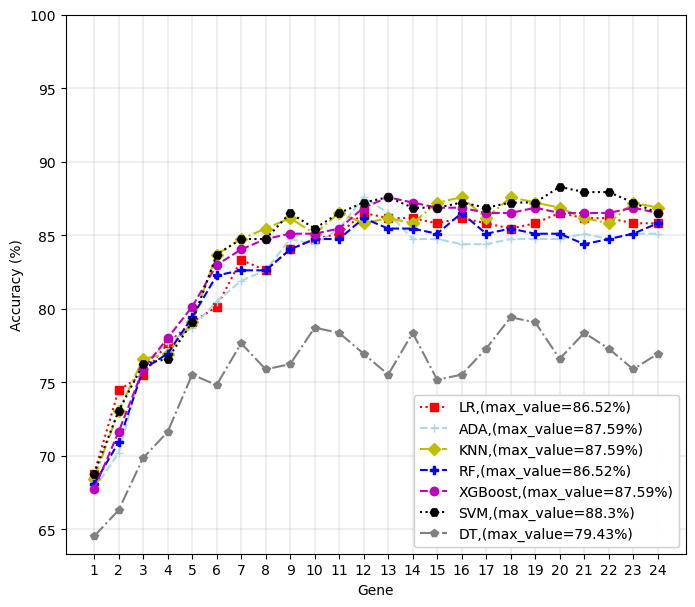

In [7]:
# Fig 5
len_gene_LR = LR_val.shape[0]
len_gene_Ada = Ada_val.shape[0]
len_gene_KNN = KNN_val.shape[0]
len_gene_RF = RF_val.shape[0]
len_gene_XGB = XGB_val.shape[0]
len_gene_SVM = SVM_val.shape[0]
len_gene_Tree = Tree_val.shape[0]

fig,ax = plt.subplots(1,1,figsize=(8,7))

LR_line_val, = ax.plot(np.arange(1,len_gene_LR+1,1),LR_val['ACC'],marker="s",color="r",label=f"LR,(max_value={(LR_max)}%)",linestyle=":")
Ada_line_val, = ax.plot(np.arange(1,len_gene_Ada+1,1),Ada_val['ACC'],marker="+",color="lightblue",label=f'ADA,(max_value={Ada_max}%)',linestyle="--")
KNN_line_val, = ax.plot(np.arange(1,len_gene_KNN+1,1),KNN_val['ACC'],marker="D",color="y",label=f'KNN,(max_value={KNN_max}%)',linestyle="-.")
RF_line_val, = ax.plot(np.arange(1,len_gene_RF+1,1),RF_val['ACC'],marker="P",color="b",label=f'RF,(max_value={RF_max}%)',linestyle="--")
XGB_line_val, = ax.plot(np.arange(1,len_gene_XGB+1,1),XGB_val['ACC'],marker="o",color="m",label=f'XGBoost,(max_value={(XGB_max)}%)',linestyle="--")
SVM_line_val, = ax.plot(np.arange(1,len_gene_SVM+1,1),SVM_val['ACC'],marker="H",color="k",label=f'SVM,(max_value={SVM_max}%)',linestyle=":")
Tree_line_val, = ax.plot(np.arange(1,len_gene_Tree+1,1),Tree_val['ACC'],marker="p",color="gray",label=f'DT,(max_value={Tree_max}%)',linestyle="-.")
first_legend = ax.legend(handles=[LR_line_val,Ada_line_val,KNN_line_val,RF_line_val,XGB_line_val,SVM_line_val,Tree_line_val],loc='lower right')
ax.add_artist(first_legend)
ax.grid(linestyle='-',alpha=0.2,which='both',linewidth=1.5)
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(top=100)
ax.set_xlabel("Gene")
ax.set_xticks(range(1,25,1))
plt.show()

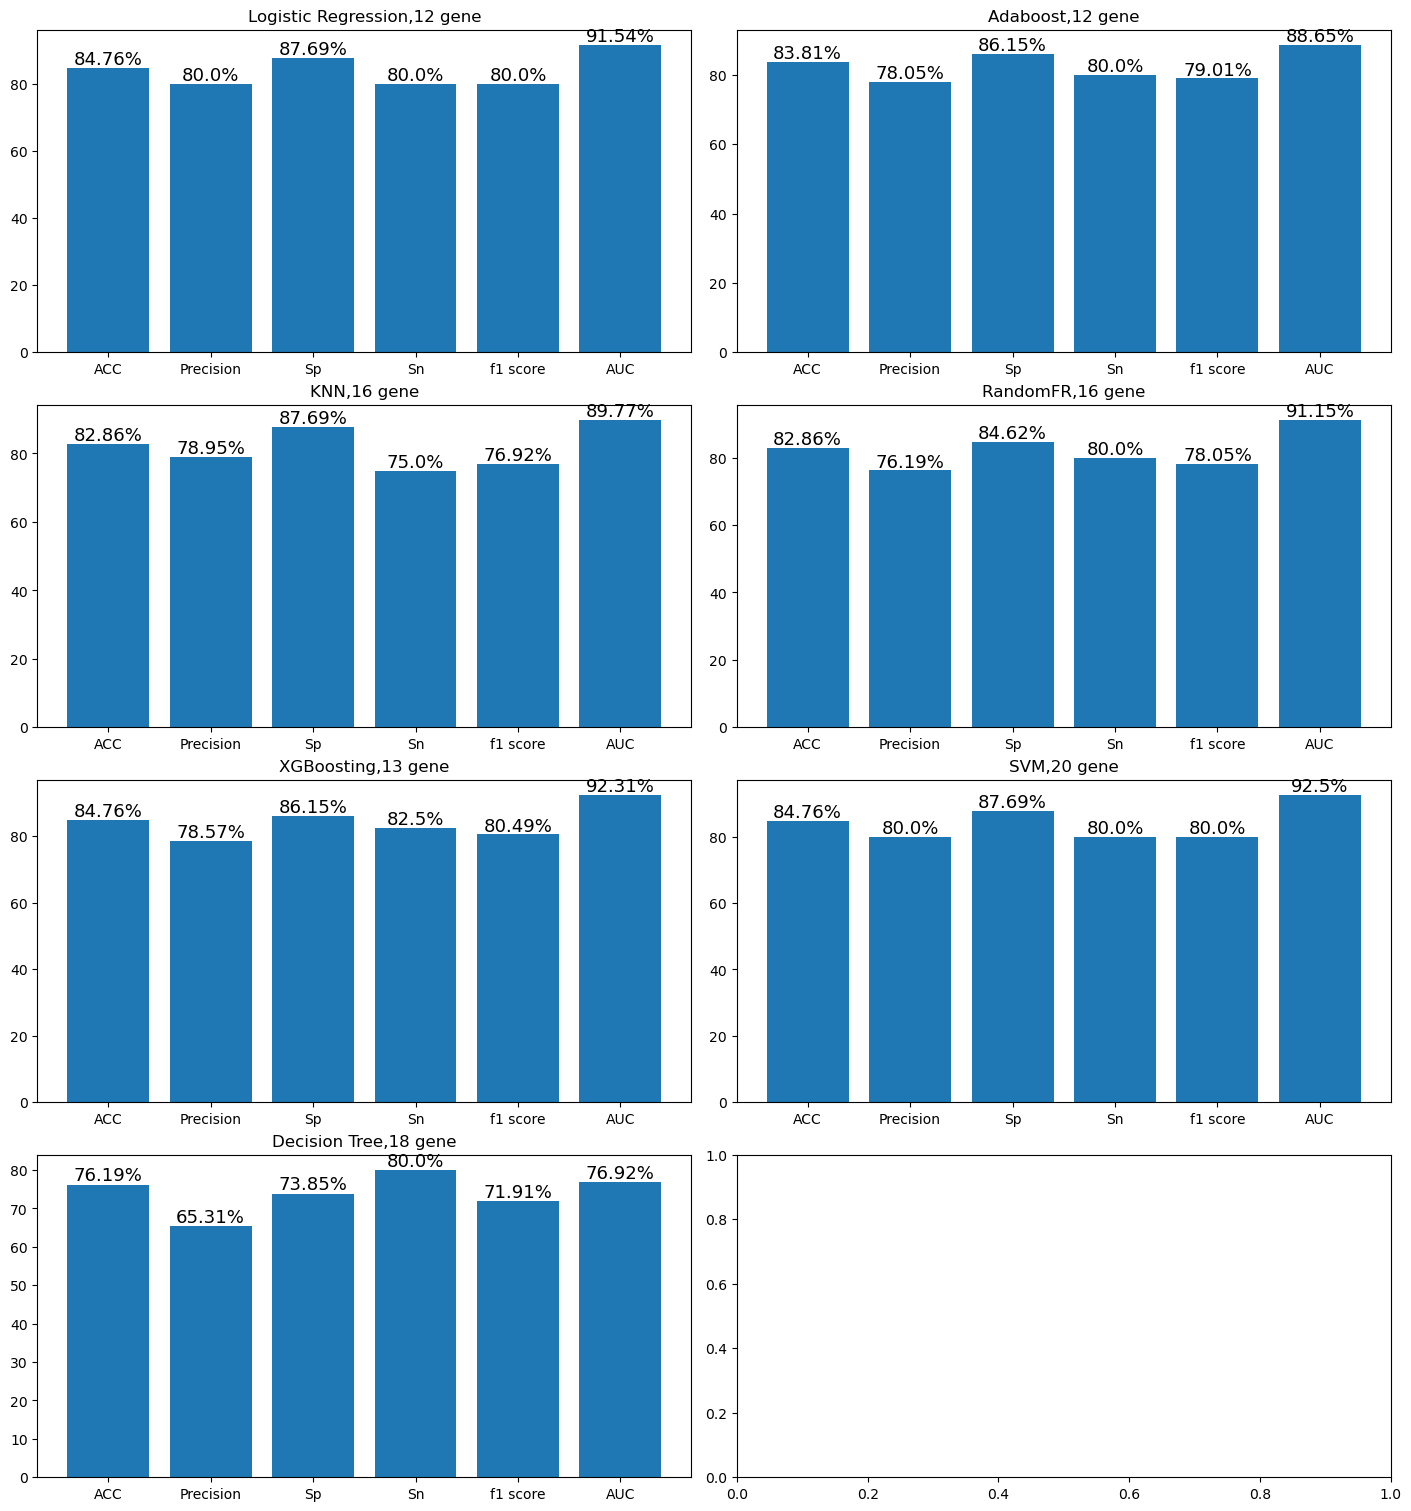

In [8]:
fig,axs = plt.subplots(4,2,figsize=(14,15),layout='constrained')
models = [LR_test,Ada_test,KNN_test,RF_test,XGB_test,SVM_test,Tree_test]
titles = []
names = ['Logistic Regression','Adaboost','KNN','RandomFR','XGBoosting','SVM','Decision Tree']
for model,name in zip(models,names):
    len_gene = len(model.iloc[0,1].split(','))
    titles.append(f'{name},{len_gene} gene')
for ax,index in zip(axs.flat,range(7)):
    ax.set_title(f"{titles[index]}")
    ax.bar(['ACC','Precision','Sp','Sn','f1 score','AUC'],models[index].iloc[0,2:-1].values)
    for i in range(6):
        ax.text(i,models[index].iloc[0,i+2]+1,f"{models[index].iloc[0,i+2]}%",ha="center",size=13)

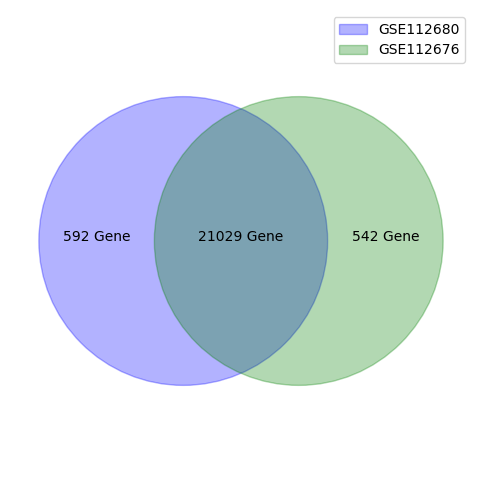

In [9]:
# Fig2:Plot overlap chart
circle1 = plt.Circle((-1,0),2.5,color='b',alpha=0.3)
circle2 = plt.Circle((1,0),2.5,color='g',alpha=0.3)
plt.figure(figsize=(8,6))
ax = plt.gca()
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.text(-2.5,0,'592 Gene',ha="center")
ax.text(2.5,0,'542 Gene',ha="center")
ax.text(0,0,'21029 Gene',ha="center")
ax.legend(["GSE112680","GSE112676"])
ax.set_aspect("equal")
ax.set_axis_off()
plt.show()

In [10]:
df_featureSelection = pd.read_csv("./data_preprocessing/mmpc_feature.csv")
df_featureSelection.sort_values(by="scores",ascending=True,inplace=True)

In [11]:
# np.arange(0,int(df_featureSelection["scores"].max())+2,1)

In [12]:
# df_featureSelection['feature'][:10][::-1]

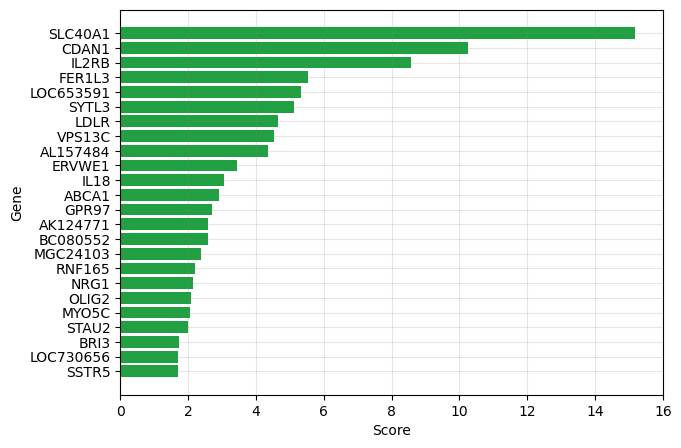

In [13]:
# Fig 3:Chart bar for scores feature selection
plt.figure(figsize=(7,5))
plt.barh(df_featureSelection['feature'],df_featureSelection['scores'],color="#1fa141")
plt.xlim([0,int(df_featureSelection["scores"].max())+1])
plt.xlabel("Score")
plt.ylabel("Gene")
plt.grid(linestyle='-',color='grey',alpha=0.2)
plt.show()

In [16]:
df_coef = pd.read_csv("./Feature_selection/feature_ranks.csv")
df_coef.sort_values(by="coef",ascending=False,inplace=True)
df_coef

,Gene,coef
0,IL18,0.308100
1,FER1L3,0.245651
2,AL157484,0.230726
3,VPS13C,0.217905
4,LOC653591,0.185959
5,IL2RB,0.183808
6,ABCA1,0.173677
7,ERVWE1,0.167853
8,LDLR,0.148391
9,SYTL3,0.136935


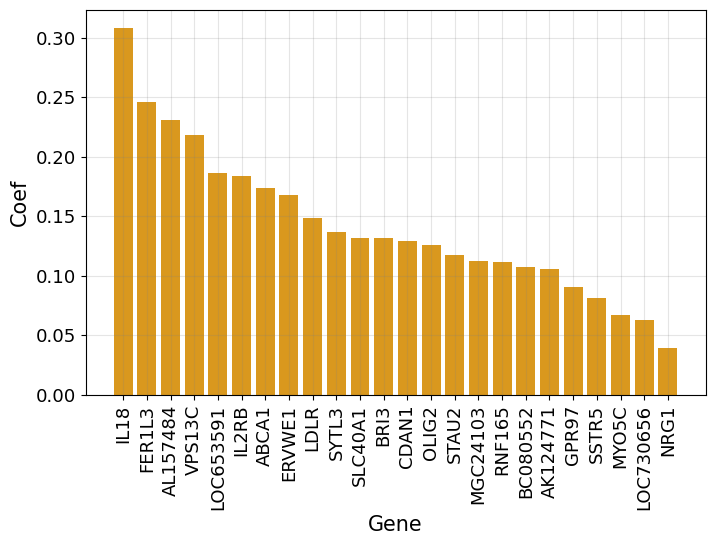

In [17]:
# Fig 4
x_pos = [i for i in range(0,len(df_coef['Gene']),1)]
plt.figure(figsize=(8,5))
plt.bar(df_coef['Gene'],df_coef['coef'],width=0.8,color="#d9981e")
plt.xlabel("Gene",fontsize=15)
plt.ylabel("Coef",fontsize=15)
plt.xticks(x_pos,rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.grid(linestyle='-',color='grey',alpha=0.2)
plt.show()

In [18]:
# Import data AUC test
LR_test_AUC = pd.read_csv("./Results/LR_test_AUC.csv")
Ada_test_AUC = pd.read_csv("./Results/Adaboost_test_AUC.csv")
KNN_test_AUC = pd.read_csv("./Results/KNN_test_AUC.csv")
RF_test_AUC = pd.read_csv("./Results/RandomFR_test_AUC.csv")
XGB_test_AUC = pd.read_csv("./Results/XGBoosting_test_AUC.csv")
SVM_test_AUC = pd.read_csv("./Results/SVM_test_AUC.csv")
Tree_test_AUC = pd.read_csv("./Results/DecisionTree_test_AUC.csv")

In [19]:
Tree_test_AUC

,Unnamed: 0,fpr,tpr
0,0,0.000000,0.0
1,1,0.261538,0.8
2,2,1.000000,1.0


In [20]:
# Get max accuracy of validation 
LR_max_AUC = LR_test['AUC'].values[0]
Ada_max_AUC = Ada_test['AUC'].values[0]
KNN_max_AUC = KNN_test['AUC'].values[0]
RF_max_AUC = RF_test['AUC'].values[0]
XGB_max_AUC = XGB_test['AUC'].values[0]
SVM_max_AUC = SVM_test['AUC'].values[0]
Tree_max_AUC = Tree_test['AUC'].values[0]

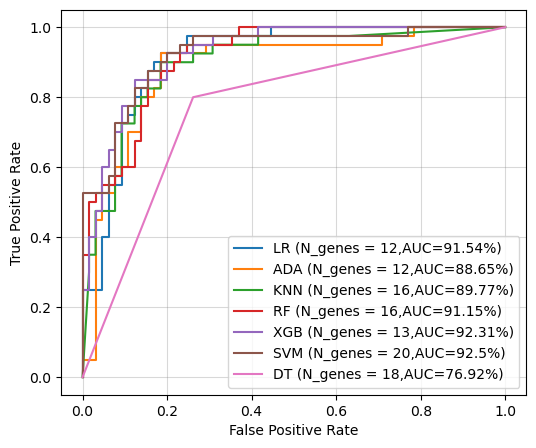

In [21]:
models = [LR_test,Ada_test,KNN_test,RF_test,XGB_test,SVM_test,Tree_test]
num_gene = []
for model in models:
    num_gene.append(len(model.iloc[0,1].split(',')))
plt.figure(figsize=(6,5))
plt.plot(LR_test_AUC['fpr'],LR_test_AUC['tpr'])
plt.plot(Ada_test_AUC['fpr'],Ada_test_AUC['tpr'])
plt.plot(KNN_test_AUC['fpr'],KNN_test_AUC['tpr'])
plt.plot(RF_test_AUC['fpr'],RF_test_AUC['tpr'])
plt.plot(XGB_test_AUC['fpr'],XGB_test_AUC['tpr'])
plt.plot(SVM_test_AUC['fpr'],SVM_test_AUC['tpr'])
plt.plot(Tree_test_AUC['fpr'],Tree_test_AUC['tpr'])
plt.legend([f'LR (N_genes = {num_gene[0]},AUC={round(LR_max_AUC,2)}%)',f'ADA (N_genes = {num_gene[1]},AUC={round(Ada_max_AUC,2)}%)',f'KNN (N_genes = {num_gene[2]},AUC={round(KNN_max_AUC,2)}%)',f'RF (N_genes = {num_gene[3]},AUC={round(RF_max_AUC,2)}%)',f'XGB (N_genes = {num_gene[4]},AUC={round(XGB_max_AUC,2)}%)',f'SVM (N_genes = {num_gene[5]},AUC={round(SVM_max_AUC,2)}%)',f'DT (N_genes = {num_gene[6]},AUC={round(Tree_max_AUC,2)}%)'])
plt.grid(linestyle='-',alpha=0.3,color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [22]:
LR_test_acc = round(LR_test['ACC'].values[0],2)
Ada_test_acc = round(Ada_test['ACC'].values[0],2)
KNN_test_acc = round(KNN_test['ACC'].values[0],2)
RF_test_acc = round(RF_test['ACC'].values[0],2)
XGB_test_acc = round(XGB_test['ACC'].values[0],2)
SVM_test_acc = round(SVM_test['ACC'].values[0],2)
Tree_test_acc = round(Tree_test['ACC'].values[0],2)


In [23]:
LR_test_f1 = round(LR_test['f1_Score'].values[0],2)
Ada_test_f1 = round(Ada_test['f1_Score'].values[0],2)
KNN_test_f1 = round(KNN_test['f1_Score'].values[0],2)
RF_test_f1 = round(RF_test['f1_Score'].values[0],2)
XGB_test_f1 = round(XGB_test['f1_Score'].values[0],2)
SVM_test_f1 = round(SVM_test['f1_Score'].values[0],2)
Tree_test_f1 = round(Tree_test['f1_Score'].values[0],2)


In [24]:
[LR_test_f1,Ada_test_f1,KNN_test_f1,RF_test_f1,XGB_test_f1,SVM_test_f1,Tree_test_f1]

[80.0, 79.01, 76.92, 78.05, 80.49, 80.0, 71.91]

In [25]:
names = ['LR','Adaboost','KNN','RF','XGB','SVM','Decision Tree']
[LR_test_acc,Ada_test_acc,KNN_test_acc,RF_test_acc,XGB_test_acc,SVM_test_acc,Tree_test_acc]

[84.76, 83.81, 82.86, 82.86, 84.76, 84.76, 76.19]

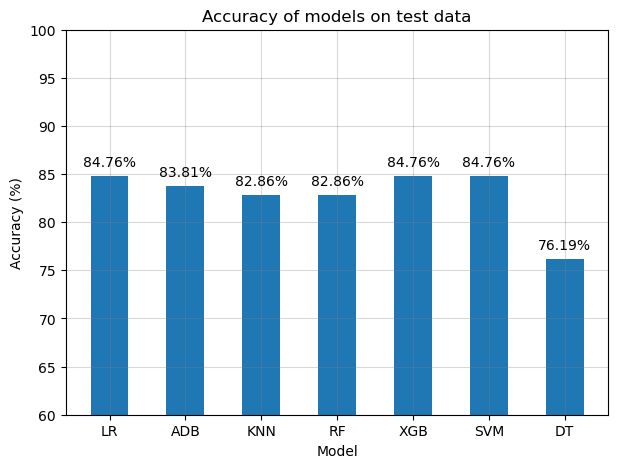

In [26]:
values_acc_test = [LR_test_acc,Ada_test_acc,KNN_test_acc,RF_test_acc,XGB_test_acc,SVM_test_acc,Tree_test_acc]
name_value = ['LR','ADB','KNN','RF','XGB','SVM','DT']
plt.figure(figsize=(7,5))
plt.bar(name_value,values_acc_test,width=0.5)
for i,value in enumerate(values_acc_test):
    plt.text(i,value+1,f"{value}%",ha="center")
plt.xlabel("Model")
plt.title("Accuracy of models on test data")
plt.ylabel("Accuracy (%)")
plt.grid(linestyle='-',alpha=0.3,color="gray")
plt.ylim(top=100,bottom=60)
plt.show()

In [27]:
[LR_test_f1,Ada_test_f1,KNN_test_f1,RF_test_f1,XGB_test_f1,SVM_test_f1,Tree_test_f1]

[80.0, 79.01, 76.92, 78.05, 80.49, 80.0, 71.91]

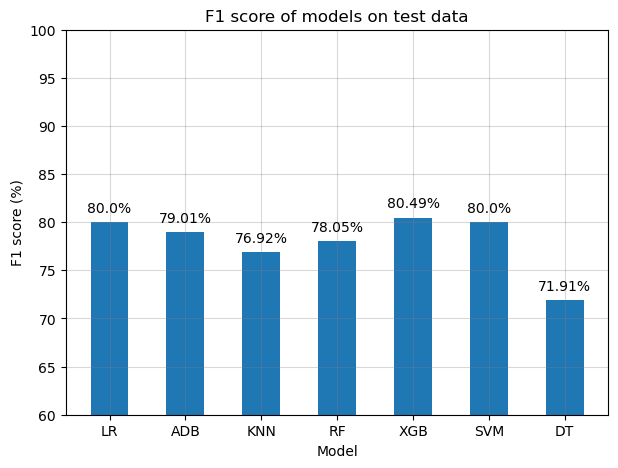

In [28]:
values_f1_test  = [LR_test_f1,Ada_test_f1,KNN_test_f1,RF_test_f1,XGB_test_f1,SVM_test_f1,Tree_test_f1]
name_value = ['LR','ADB','KNN','RF','XGB','SVM','DT']
plt.figure(figsize=(7,5))
plt.bar(name_value,values_f1_test,width=0.5)
for i,value in enumerate(values_f1_test):
    plt.text(i,value+1,f"{value}%",ha="center")
plt.xlabel("Model")    
plt.title("F1 score of models on test data")
plt.ylabel("F1 score (%)")
plt.grid(linestyle='-',alpha=0.3,color="gray")
plt.ylim(bottom=60,top=100)
plt.show()